In [2]:
from crewai import Agent, Task, Crew
import google.generativeai as genai
from dotenv import load_dotenv
import os
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langgraph.checkpoint.memory import InMemorySaver

load_dotenv()
model = genai.GenerativeModel('gemini-2.5-flash-lite')
genai.configure(api_key=os.getenv("GOOGLE_API_KEY"))

/home/someone_practicing/AI/aienvv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [18]:
class SaleState(TypedDict):
    customer_email: str
    customer_profile: str
    products_visiting: list[str]
    wishlist: list[str]
    products_visited: list[str]
    product_price: float
    customer_name: str
    cart: list[str]
    sale_confirmed: bool
    problems: list[str]
    recommended_next_agent: str
    history: list[str]

In [12]:
def master_sale(state: SaleState):
    # Implement the logic for the master sale agent
    pass

def find_recommendations(state: SaleState):
    # Implement the logic for the find recommendations agent
    pass

def check_inventory(state: SaleState):
    # Implement the logic for the check inventory agent
    pass

def process_payment(state: SaleState):
    # Implement the logic for the process payment agent
    pass

def process_fulfillment(state: SaleState):
    # Implement the logic for the process fulfillment agent
    pass

def post_purchase_followup(state: SaleState):
    # Implement the logic for the post-purchase follow-up agent
    pass

def manage_loyalty_offers(state: SaleState):
    # Implement the logic for the manage loyalty offers agent
    pass

def update_crm(state: SaleState['customer_profile']):
    # Implement the logic for the update CRM agent
    pass

def handle_objections(state: SaleState):
    # Implement the logic for the handle objections agent
    pass

def record_problems(state: SaleState['problems']):
    # Implement the logic for the record problems agent
    pass

def check_approval(state: SaleState):
    # Implement the logic for the check approval agent
    pass

def handle_cart(state: SaleState['cart']):
    # Implement the logic for the handle cart agent
    pass

def validaate_sale(state: SaleState):
    # Implement the logic for the validate sale agent
    pass


In [ ]:
graph = StateGraph(SaleState, saver=InMemorySaver())

graph.add_node('Sales Agent', master_sale)
graph.add_node('Recommendation Agent', find_recommendations)
graph.add_node('Inventory Agent', check_inventory)
graph.add_node('Cart Agent', handle_cart)
graph.add_node('Fulfillment Agent', process_fulfillment)
graph.add_node('Payment Agent', process_payment)
graph.add_node('Post Purchase Agent', post_purchase_followup)
graph.add_node('Loyalty and offers Agent', manage_loyalty_offers)
graph.add_node('CRM Agent', update_crm)
graph.add_node('Validator Agent', validaate_sale)
graph.add_node('Error Catching Agent', record_problems)


graph.add_edge(START, 'Sales Agent')
graph.add_edge('Sales Agent', 'Recommendation Agent')

graph.add_conditional_edges('Recommendation Agent', check_inventory, {'move_forward': 'Cart Agent', 'available later': 'Inventory Agent', 'see_more': 'Recommendation Agent'})
graph.add_conditional_edges('Inventory Agent', check_approval, {'approved': 'Cart Agent', 'rejected': 'Recommendation Agent'})
graph.add_edge('Cart Agent', 'Loyalty and offers Agent')
graph.add_edge('Loyalty and offers Agent', 'Validator Agent')
graph.add_conditional_edges('Validator Agent',check_approval,{'approved': 'Payment Agent', 'rejected': 'Cart Agent'})
graph.add_edge('Payment Agent', 'Fulfillment Agent')
graph.add_edge('Fulfillment Agent', 'CRM Agent')



workflow = graph.compile()


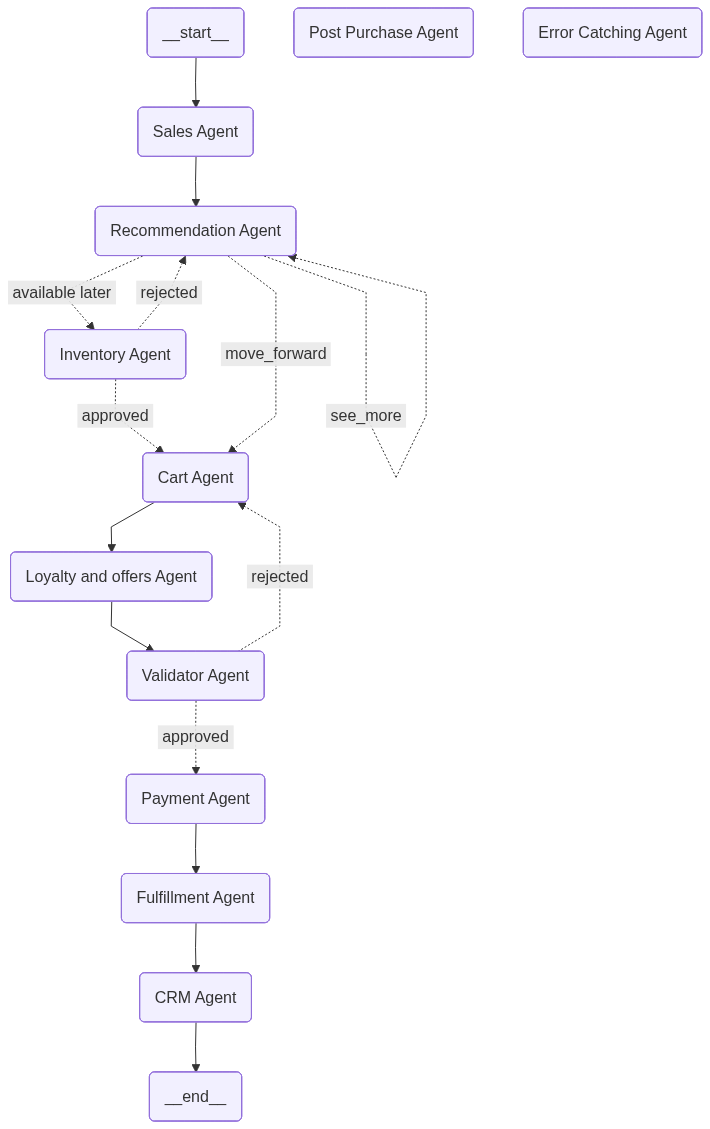

In [19]:
workflow